In [48]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn
from sklearn.model_selection import train_test_split
import librosa
from pydub import AudioSegment
from matplotlib import image
from matplotlib import pyplot
import glob
import imageio
import cv2
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import to_categorical

/Users/teaywright/opt/anaconda3/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


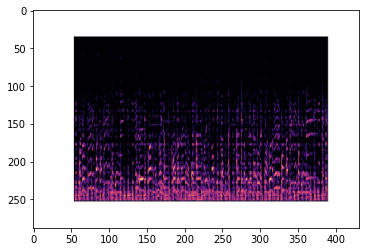

In [49]:
features = pd.read_csv("data/features_3_sec.csv")
data = imageio.imread('./Data/images_original/blues/blues00000.png')
pyplot.imshow(data)
pyplot.show()

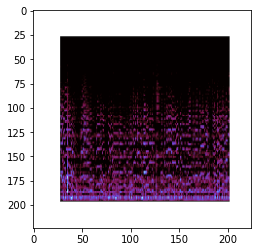

In [52]:
spectrograms = []
str_genres = []

image_dir = glob.glob("./Data/images_original/*/")
i = 0
for image_genre in image_dir:
    genre_dir = image_genre + "/*"
    images = glob.glob(genre_dir)
    genre = image_genre.split('/')
    genre = genre[-2]
    for image in images:
        spectrogram = cv2.imread(image)
        spectrogram = cv2.resize(spectrogram, (224, 224))
        pyplot.imshow(spectrogram)
        spectrogram = cv2.cvtColor(spectrogram, cv2.COLOR_BGR2RGB)
        spectrogram = spectrogram.astype(np.float32)/255
        filename = image.split('/')
        filename = filename[-1]
        if (filename == 'jazz00054.png'):
            continue
        #print(filename)
        #print(spectrogram)
        spectrograms.append(spectrogram)
        str_genres.append(genre)
        
        #spectrograms.iloc[i].spectrograms['genre'] = image_genre
        #spectrograms.iloc[i].spectrograms['spectrogram'] = image.imread('./Data/images_original/blues/blues00000.png')
        i += 1
spectrograms = np.array(spectrograms)
#str_genres = np.array(genres)


In [53]:
#load background noise files

food_court = librosa.load('data/background_noise/food-court-1.wav')
bus_interior = librosa.load('data/background_noise/bus-interior-1.wav')
river = librosa.load('data/background_noise/river-1.wav')
spring_sounds = librosa.load('data/background_noise/spring-weather-1.wav')
traffic = librosa.load('data/background_noise/street-traffic-1.wav')

In [75]:
music = AudioSegment.from_file('data/genres_original/blues/blues.00000.wav')
background = AudioSegment.from_file('data/background_noise/river-1.wav')

test_combined = music.overlay(background) #don't need to crop?

test_combined.export("data/with_background_noise/test_combined.wav", format='wav')

<_io.BufferedRandom name='data/with_background_noise/test_combined.wav'>

Text(0.5, 1.0, 'Test Background Noise Mel Spectrogram')

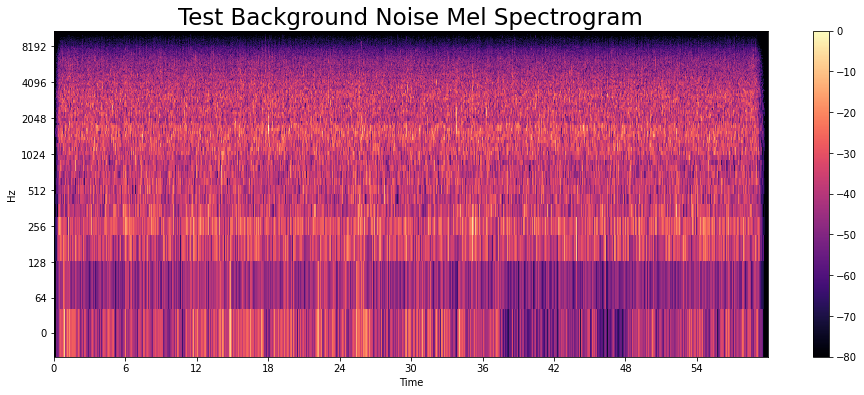

In [76]:
y, sr = river
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, x_axis = 'time', y_axis = 'log')
plt.colorbar()
plt.title("Test Background Noise Mel Spectrogram", fontsize = 23)


Text(0.5, 1.0, 'Test Mel Spectrogram')

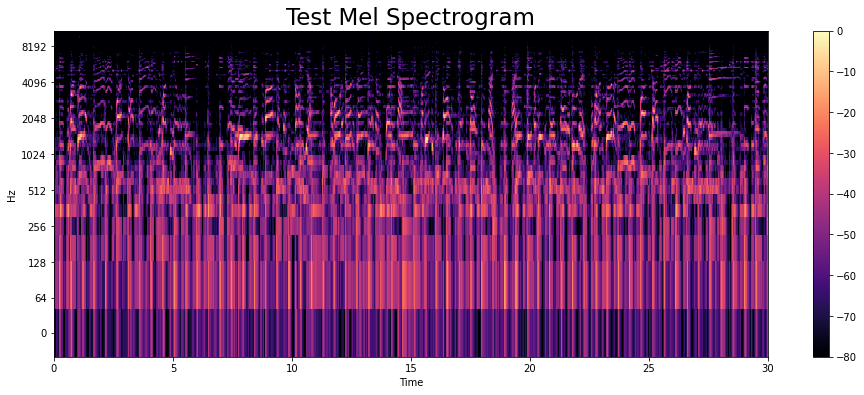

In [77]:
y, sr = librosa.load('data/genres_original/blues/blues.00000.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, x_axis = 'time', y_axis = 'log')
plt.colorbar()
plt.title("Test Mel Spectrogram", fontsize = 23)


Text(0.5, 1.0, 'Test Mel Spectrogram')

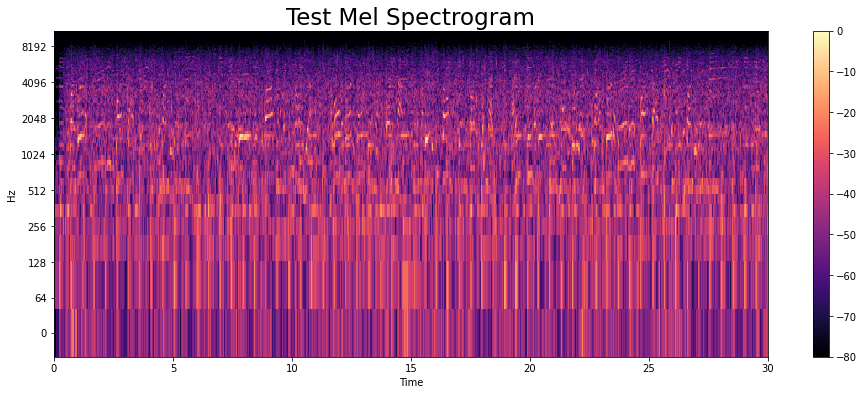

In [78]:
y, sr = librosa.load('data/with_background_noise/test_combined.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, x_axis = 'time', y_axis = 'log')
plt.colorbar()
plt.title("Test Mel Spectrogram", fontsize = 23)

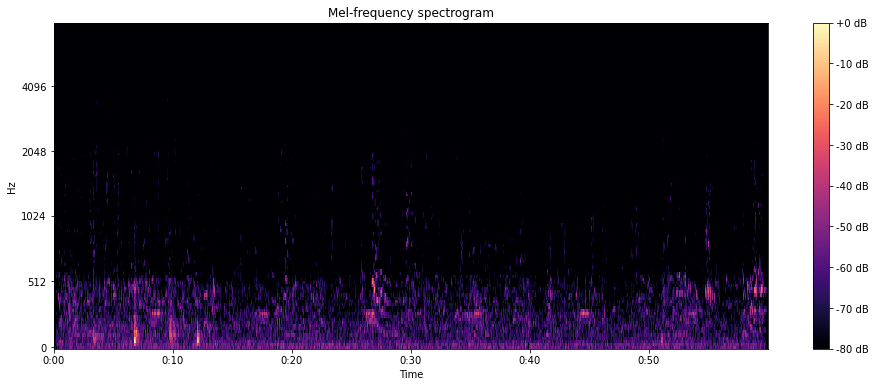

In [79]:
y, sr = food_court
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()

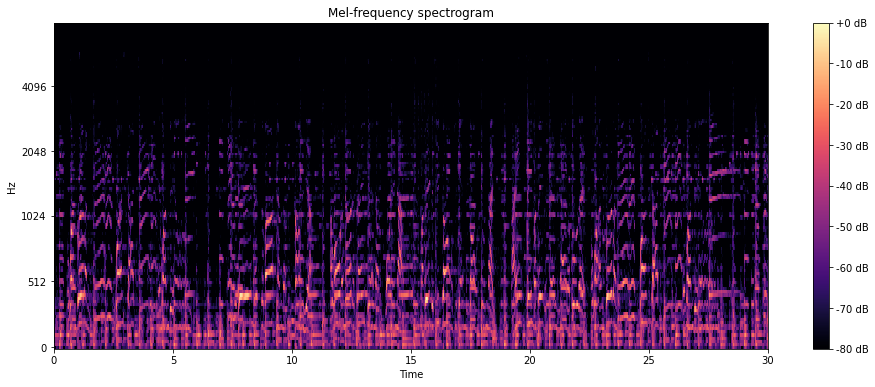

In [80]:
#testing

y, sr = librosa.load('data/genres_original/blues/blues.00000.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()

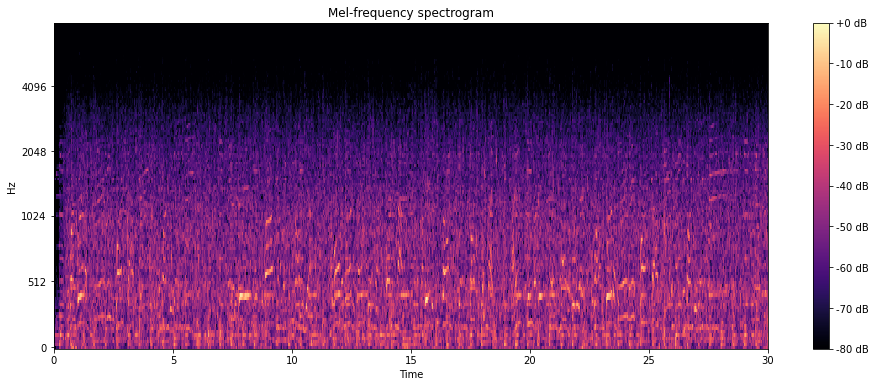

In [81]:
#testing

y, sr = librosa.load("data/with_background_noise/test_combined.wav")
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(16, 6))
librosa.display.specshow(S_DB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()